<a href="https://colab.research.google.com/github/aws3ma/traitement-image-video/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

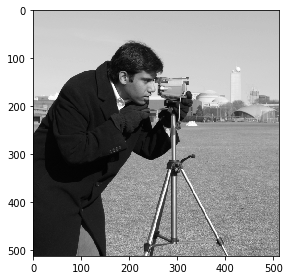

In [ ]:
from skimage import data
import skimage.io as io
camera = data.camera()
io.imshow(camera)

le filtre random_noise fournit par la librairie skimage permet de changer le valeurs des pixel avec une quantité précis passer en parametre compris entre 0 et 1.

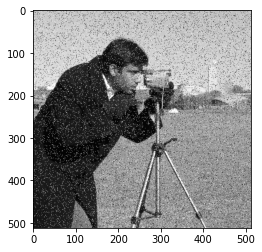

In [ ]:
from skimage.util import random_noise
import matplotlib.pyplot as plt
camera_noise=random_noise(camera,mode='s&p', amount=0.1)
plt.imshow(camera_noise,cmap="gray")


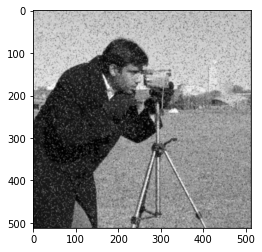

In [ ]:
from scipy.ndimage import convolve
import numpy as np
k = np.ones((3,3),dtype=np.int8)
k = k*1/9
moy_cam_noi= convolve(camera_noise, k, mode='constant')
plt.imshow(moy_cam_noi,cmap="gray")

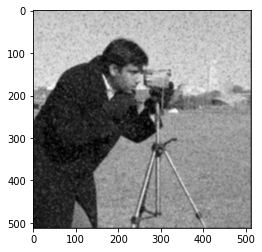

In [ ]:
k = np.ones((5,5),dtype=np.int8)
k = k*(1/(5*5))
moy_cam_noi= convolve(camera_noise, k, mode='constant')
plt.imshow(moy_cam_noi,cmap="gray")

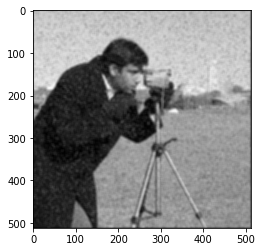

In [ ]:
k = np.ones((7,7),dtype=np.int8)
k = k*(1/(7*7))
moy_cam_noi= convolve(camera_noise, k, mode='constant')
plt.imshow(moy_cam_noi,cmap="gray")

tant que le noyeaux est plus grand, l'image devient plus flou et les contour disparaître et le bruit diminue

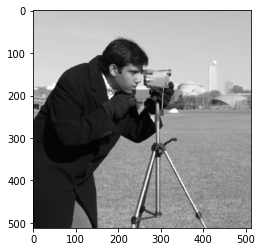

In [ ]:
from scipy.ndimage import median_filter
median_cam_noise = median_filter(camera_noise,size=(3,3))
plt.imshow(median_cam_noise,cmap="gray")

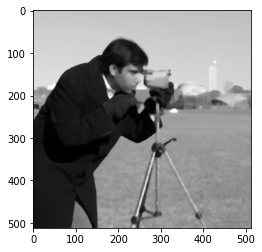

In [ ]:
median_cam_noise = median_filter(camera_noise,size=(7,7))
plt.imshow(median_cam_noise,cmap="gray")



*   le filtre median_filtre fournit par scipy permet de supprimer les bruit
*   le filtre median est plus efficase pour supprimer les bruit mieux que le filtre moyonneur qui peut seulement diminuer les bruits



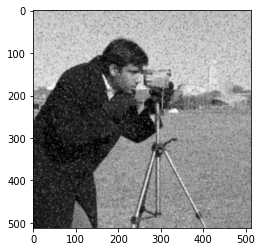

In [ ]:
from skimage.filters import gaussian
gauss_camera_noise = gaussian(camera_noise,1)
plt.imshow(gauss_camera_noise,cmap="gray")

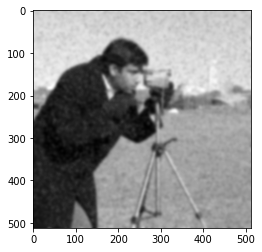

In [ ]:
gauss_camera_noise = gaussian(camera_noise,3)
plt.imshow(gauss_camera_noise,cmap="gray")

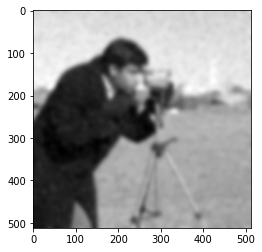

In [ ]:
gauss_camera_noise = gaussian(camera_noise,5)
plt.imshow(gauss_camera_noise,cmap="gray")

Le filtre gaussian fournit par la librairie skimage permet de mettre l'image flou avec l'augmentation de sigma

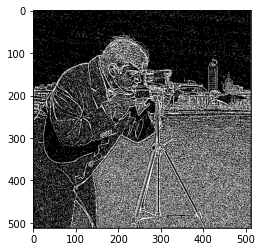

In [ ]:
Fph = np.ones((3,3),dtype=np.int8)
Fph[1,1]=-8
Fph=Fph*-1
Fph=Fph*1/9
IPH = convolve(camera,Fph,mode="constant")
plt.imshow(IPH,cmap="gray")

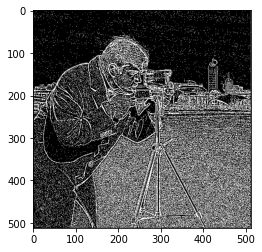

In [ ]:
Fpb = np.ones((3,3),dtype=np.int8)
Fpb = Fpb*1/9
IPB= convolve(camera, Fpb, mode='constant')
plt.imshow(camera-IPB,cmap="gray")

image pass haut = image - image pass bas

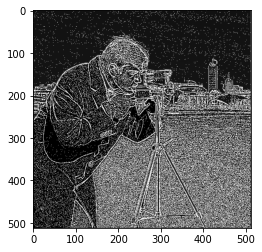

In [ ]:
A = 1.1
IHB = (A-1)*camera+IPH
plt.imshow(IHB,cmap="gray")

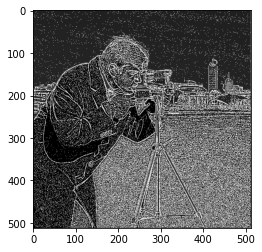

In [ ]:
A = 1.2
IHB = (A-1)*camera+IPH
plt.imshow(IHB,cmap="gray")

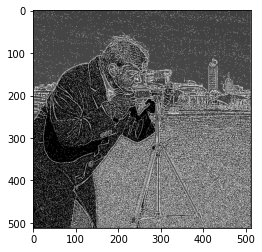

In [ ]:
A = 1.5
IHB = (A-1)*camera+IPH
plt.imshow(IHB,cmap="gray")

avec l'augmentation de la valeur A, les contours devient de plus invisible et le bruit devient plus visible.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
trait_img_vid_folder='/content/drive/MyDrive/trait_img_vid/'

Mounted at /content/drive


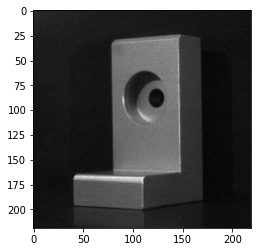

In [ ]:
L=io.imread(trait_img_vid_folder+"TP3/L.png")
plt.imshow(L,cmap="gray")

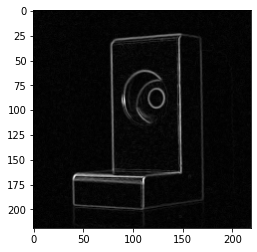

In [ ]:
from skimage.filters import sobel, prewitt
l_sobel = sobel(L)
plt.imshow(l_sobel,cmap="gray")


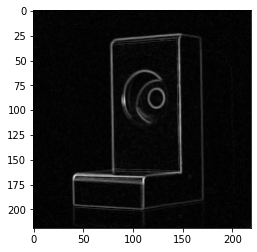

In [ ]:
l_prewitt = prewitt(L)
plt.imshow(l_prewitt,cmap="gray")

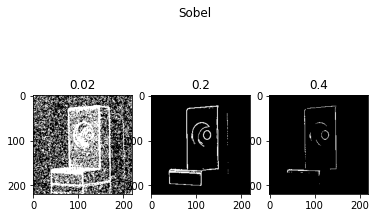

In [ ]:
seuil = [0.02,0.2,0.4]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Sobel")
z=l_sobel>seuil[0]*l_sobel.max()
ax1.imshow(z, cmap="gray")
ax1.set_title("0.02")
z=l_sobel>seuil[1]*l_sobel.max()
ax2.imshow(z, cmap="gray")
ax2.set_title("0.2")
z=l_sobel>seuil[2]*l_sobel.max()
ax3.imshow(z, cmap="gray")
ax3.set_title("0.4")
plt.show()

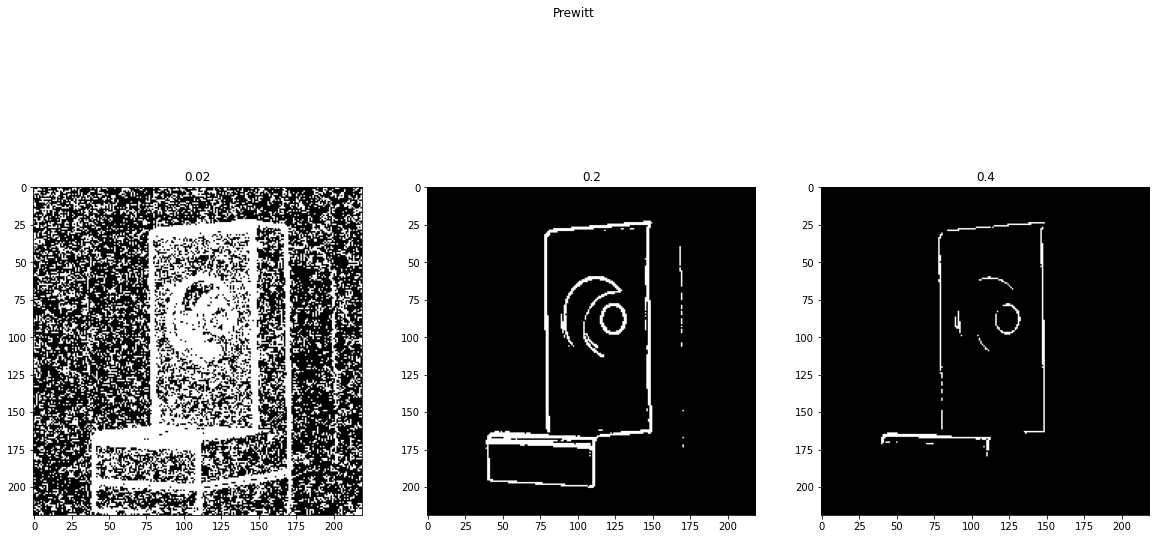

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,10))
fig.suptitle("Prewitt")
z=l_prewitt>seuil[0]*l_prewitt.max()
ax1.imshow(z, cmap="gray")
ax1.set_title("0.02")
z=l_prewitt>seuil[1]*l_prewitt.max()
ax2.imshow(z, cmap="gray")
ax2.set_title("0.2")
z=l_prewitt>seuil[2]*l_prewitt.max()
ax3.imshow(z, cmap="gray")
ax3.set_title("0.4")
plt.show()

je peut remarquer d'aprés les figures que la seuil optimal d'aprés ces trois [0.02,0.2,0.4] est 0.2. <br/> le petit suil cause des bruits et le grand seuil effacer quelque contour. 

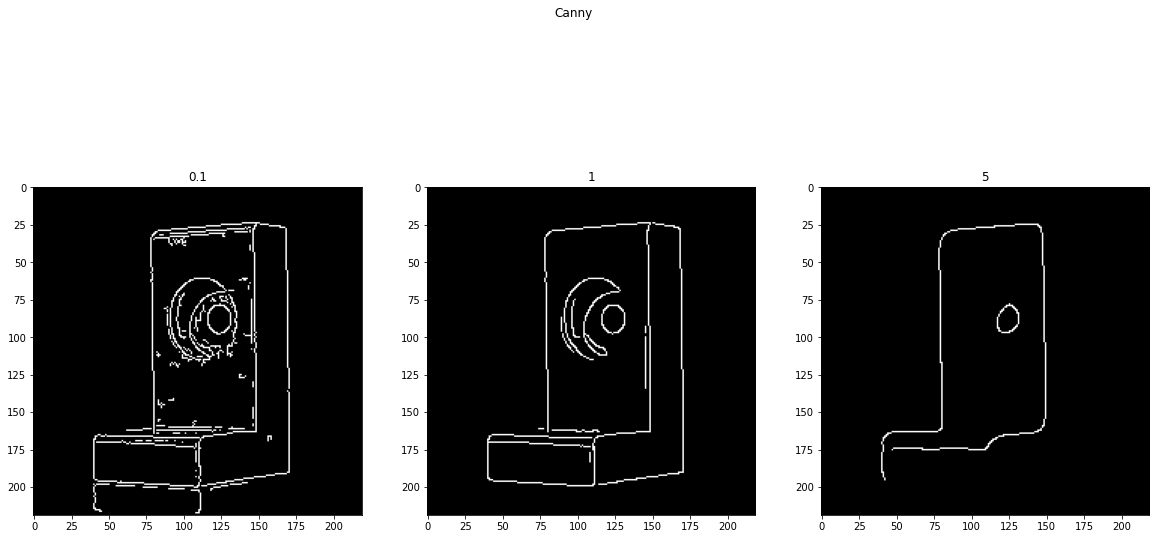

In [ ]:
from skimage.feature import canny
sigma=[0.1,1,5]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,10))
fig.suptitle("Canny")
l_canny = canny(L,sigma=sigma[0])
ax1.imshow(l_canny, cmap="gray")
ax1.set_title("0.1")
l_canny = canny(L,sigma=sigma[1])
ax2.imshow(l_canny, cmap="gray")
ax2.set_title("1")
l_canny = canny(L,sigma=sigma[2])
ax3.imshow(l_canny, cmap="gray")
ax3.set_title("5")
plt.show()

je peut constater que le petit valeur (sigma<1) du sigma ajouter des bruits et le grand valeur (sigma>1) du sigma effacer quelque contour. <br/>
le bon valeur sigma est 1(deja c'est le valeur du sigma par défaut).

je compare avec la methode precedente, la methode de canny est plus efficase.dans le cas optimal, le methode de canny afficher clairement les contours.